In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
train_df = pd.read_excel('Data_Train.xlsx')

In [197]:
test_df=pd.read_excel('Test_set.xlsx')

In [198]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [199]:
combined_df = train_df.append(test_df,sort=False)

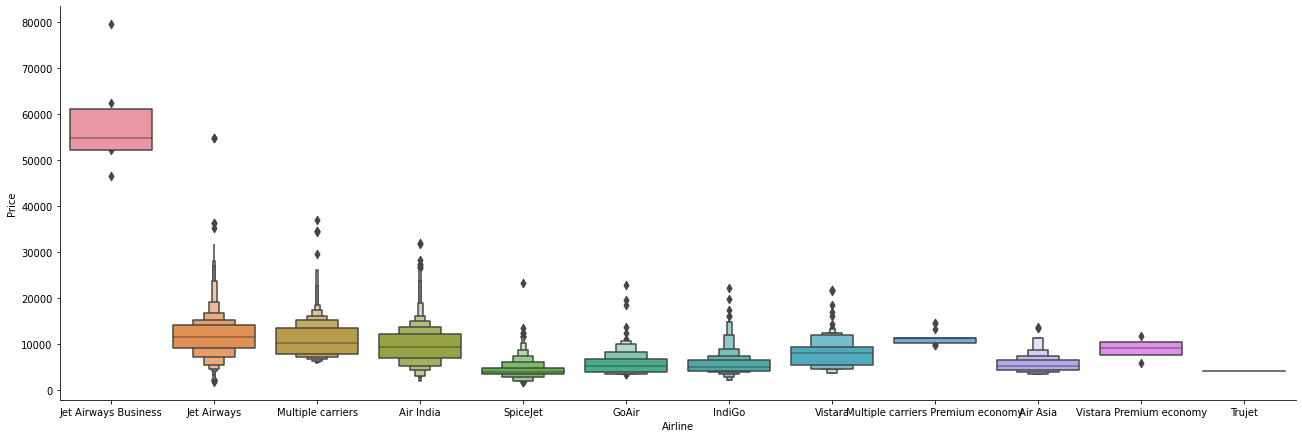

In [200]:
# Airline vs Price # airline is also an importtant feature
sns.catplot(y = "Price", x = "Airline", data = train_df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

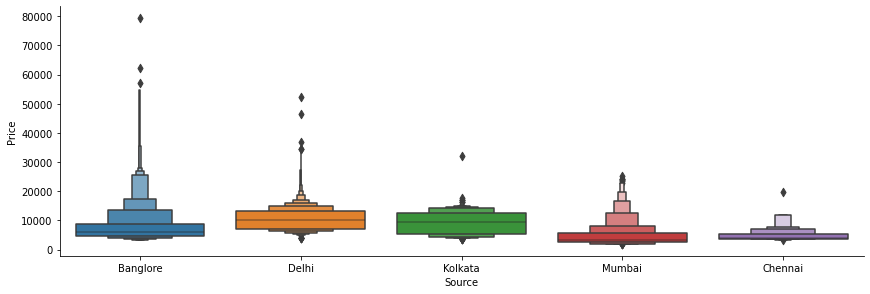

In [201]:
# Source vs Price
sns.catplot(y = "Price", x = "Source", data = train_df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [202]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


# Feature Engineering

In [203]:
combined_df['Date'] = combined_df['Date_of_Journey'].str.split('/').str[0].astype(int)
combined_df['Month'] = combined_df['Date_of_Journey'].str.split('/').str[1].astype(int)
combined_df['Year'] = combined_df['Date_of_Journey'].str.split('/').str[2].astype(int)

In [204]:
combined_df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [205]:
combined_df = combined_df.drop(columns = 'Date_of_Journey')
combined_df['Arrival_Time'] = combined_df['Arrival_Time'].str.split(' ').str[0]

In [206]:
duration = list(combined_df["Duration"])
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip()+" 0m"
        else:
            duration[i] = "0h "+duration[i]
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [207]:
combined_df["Duration_hours"] = duration_hours
combined_df["Duration_mins"] = duration_mins

In [208]:
combined_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25,23h 55m,1 stop,No info,NaN,6,6,2019,23,55
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,3,2019,2,35
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25,6h 35m,1 stop,No info,NaN,6,3,2019,6,35
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,3,2019,15,15


In [209]:
combined_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Duration_hours       int64
Duration_mins        int64
dtype: object

In [210]:
combined_df[combined_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Duration_hours,Duration_mins
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480.0,6,5,2019,23,40


In [211]:
combined_df['Total_Stops'] = combined_df['Total_Stops'].fillna('2 stops') #23hr flight just a wild guess
combined_df['Total_Stops'] = combined_df['Total_Stops'].replace('non-stop','0 stop')
combined_df['Total'] = combined_df['Total_Stops'].str.split(' ').str[0].astype(int)
combined_df = combined_df.drop(['Total_Stops'], axis = 1)


In [212]:
combined_df['Arrival_Hour'] = combined_df['Arrival_Time'] .str.split(':').str[0].astype(int)
combined_df['Arrival_Minute'] = combined_df['Arrival_Time'] .str.split(':').str[1].astype(int)
combined_df = combined_df.drop(['Arrival_Time'], axis=1)

In [213]:
combined_df['Departure_Hour'] = combined_df['Dep_Time'] .str.split(':').str[0].astype(int)
combined_df['Departure_Minute'] = combined_df['Dep_Time'] .str.split(':').str[1].astype(int)
combined_df = combined_df.drop(['Dep_Time'], axis=1)

In [214]:
combined_df['Price'].fillna((combined_df['Price'].mean()),inplace=True)

In [215]:
combined_df

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Duration_hours,Duration_mins,Total,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.000000,24,3,2019,2,50,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.000000,1,5,2019,7,25,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.000000,9,6,2019,19,0,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.000000,12,5,2019,5,25,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.000000,1,3,2019,4,45,1,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,No info,9087.064121,6,6,2019,23,55,1,20,25,20,30
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,No info,9087.064121,27,3,2019,2,35,0,16,55,14,20
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,No info,9087.064121,6,3,2019,6,35,1,4,25,21,50
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,No info,9087.064121,6,3,2019,15,15,1,19,15,4,0


In [216]:
combined_df.iloc[9182]

Airline                                     Air India
Source                                       Banglore
Destination                                 New Delhi
Route               BLR → CCU → BBI → HYD → VGA → DEL
Duration                                      29h 30m
Additional_Info                       Change airports
Price                                         17686.0
Date                                                1
Month                                               3
Year                                             2019
Duration_hours                                     29
Duration_mins                                      30
Total                                               4
Arrival_Hour                                       11
Arrival_Minute                                     20
Departure_Hour                                      5
Departure_Minute                                   50
Name: 9182, dtype: object

In [217]:
combined_df['place1'] = combined_df['Route'].str.split('→ ').str[0]
combined_df['place2'] = combined_df['Route'].str.split('→ ').str[1]
combined_df['place3'] = combined_df['Route'].str.split('→ ').str[2]
combined_df['place4'] = combined_df['Route'].str.split('→ ').str[3]
combined_df['place5'] = combined_df['Route'].str.split('→ ').str[4]
combined_df['place6'] = combined_df['Route'].str.split('→ ').str[5]

In [218]:
combined_df['place1'].fillna("None",inplace=True)
combined_df['place2'].fillna("None",inplace=True)
combined_df['place3'].fillna("None",inplace=True)
combined_df['place4'].fillna("None",inplace=True)
combined_df['place5'].fillna("None",inplace=True)
combined_df['place6'].fillna("None",inplace=True)

In [219]:
combined_df = combined_df.drop(['Route'], axis=1)
combined_df = combined_df.drop(['Duration'], axis=1)

In [220]:
combined_df

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Duration_hours,Duration_mins,...,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,place1,place2,place3,place4,place5,place6
0,IndiGo,Banglore,New Delhi,No info,3897.000000,24,3,2019,2,50,...,1,10,22,20,BLR,DEL,None,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.000000,1,5,2019,7,25,...,13,15,5,50,CCU,IXR,BBI,BLR,None,None
2,Jet Airways,Delhi,Cochin,No info,13882.000000,9,6,2019,19,0,...,4,25,9,25,DEL,LKO,BOM,COK,None,None
3,IndiGo,Kolkata,Banglore,No info,6218.000000,12,5,2019,5,25,...,23,30,18,5,CCU,NAG,BLR,None,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.000000,1,3,2019,4,45,...,21,35,16,50,BLR,NAG,DEL,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,No info,9087.064121,6,6,2019,23,55,...,20,25,20,30,CCU,DEL,BLR,None,None,None
2667,IndiGo,Kolkata,Banglore,No info,9087.064121,27,3,2019,2,35,...,16,55,14,20,CCU,BLR,None,None,None,None
2668,Jet Airways,Delhi,Cochin,No info,9087.064121,6,3,2019,6,35,...,4,25,21,50,DEL,BOM,COK,None,None,None
2669,Air India,Delhi,Cochin,No info,9087.064121,6,3,2019,15,15,...,19,15,4,0,DEL,BOM,COK,None,None,None


In [221]:
combined_df.dtypes

Airline              object
Source               object
Destination          object
Additional_Info      object
Price               float64
Date                  int32
Month                 int32
Year                  int32
Duration_hours        int64
Duration_mins         int64
Total                 int32
Arrival_Hour          int32
Arrival_Minute        int32
Departure_Hour        int32
Departure_Minute      int32
place1               object
place2               object
place3               object
place4               object
place5               object
place6               object
dtype: object

In [222]:
combined_df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [223]:
combined_df["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [224]:
combined_df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [225]:
combined_df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [226]:
combined_df["place1"].unique()

array(['BLR ', 'CCU ', 'DEL ', 'MAA ', 'BOM ', 'None'], dtype=object)

In [227]:
combined_df["place2"].unique()

array(['DEL', 'IXR ', 'LKO ', 'NAG ', 'BLR', 'BOM ', 'BLR ', 'CCU',
       'AMD ', 'PNQ ', 'CCU ', 'COK ', 'IDR ', 'GAU ', 'MAA ', 'HYD ',
       'COK', 'DEL ', 'HYD', 'BHO ', 'JAI ', 'ATQ ', 'JDH ', 'BBI ',
       'GOI ', 'BDQ ', 'TRV ', 'IXU ', 'IXB ', 'UDR ', 'RPR ', 'DED ',
       'VGA ', 'VNS ', 'IXC ', 'PAT ', 'JLR ', 'KNU ', 'GWL ', 'VTZ ',
       'NDC ', 'IXZ ', 'HBX ', 'IXA ', 'STV ', 'None'], dtype=object)

In [228]:
combined_df["place3"].unique()

array(['None', 'BBI ', 'BOM ', 'BLR', 'DEL', 'COK', 'DEL ', 'AMD ', 'HYD',
       'JDH ', 'MAA ', 'COK ', 'GOI ', 'NAG ', 'GAU ', 'BHO ', 'IXR ',
       'IDR ', 'ISK ', 'HYD ', 'VGA ', 'PNQ ', 'JAI ', 'TRV ', 'HBX ',
       'IMF ', 'CCU ', 'UDR ', 'VTZ ', 'IXC ', 'TIR '], dtype=object)

In [229]:
combined_df["place4"].unique()

array(['None', 'BLR', 'COK', 'DEL', 'BOM ', 'HYD', 'DEL ', 'HYD ', 'GWL ',
       'TRV ', 'BBI ', 'BHO ', 'AMD ', 'NAG '], dtype=object)

In [230]:
combined_df["place5"].unique()

array(['None', 'COK', 'BLR', 'DEL', 'HYD', 'VGA '], dtype=object)

In [231]:
combined_df["place6"].unique()

array(['None', 'DEL'], dtype=object)

In [232]:
combined_df['place1'] = combined_df['place1'].str.split(' ').str[0]
combined_df['place2'] = combined_df['place2'].str.split(' ').str[0]
combined_df['place3'] = combined_df['place3'].str.split(' ').str[0]
combined_df['place4'] = combined_df['place4'].str.split(' ').str[0]
combined_df['place5'] = combined_df['place5'].str.split(' ').str[0]
combined_df['place6'] = combined_df['place6'].str.split(' ').str[0]

In [234]:
combined_df["place1"].unique()

array(['BLR', 'CCU', 'DEL', 'MAA', 'BOM', 'None'], dtype=object)

In [235]:
combined_df["place2"].unique()

array(['DEL', 'IXR', 'LKO', 'NAG', 'BLR', 'BOM', 'CCU', 'AMD', 'PNQ',
       'COK', 'IDR', 'GAU', 'MAA', 'HYD', 'BHO', 'JAI', 'ATQ', 'JDH',
       'BBI', 'GOI', 'BDQ', 'TRV', 'IXU', 'IXB', 'UDR', 'RPR', 'DED',
       'VGA', 'VNS', 'IXC', 'PAT', 'JLR', 'KNU', 'GWL', 'VTZ', 'NDC',
       'IXZ', 'HBX', 'IXA', 'STV', 'None'], dtype=object)

In [236]:
combined_df["place3"].unique()

array(['None', 'BBI', 'BOM', 'BLR', 'DEL', 'COK', 'AMD', 'HYD', 'JDH',
       'MAA', 'GOI', 'NAG', 'GAU', 'BHO', 'IXR', 'IDR', 'ISK', 'VGA',
       'PNQ', 'JAI', 'TRV', 'HBX', 'IMF', 'CCU', 'UDR', 'VTZ', 'IXC',
       'TIR'], dtype=object)

In [237]:
combined_df["place4"].unique()

array(['None', 'BLR', 'COK', 'DEL', 'BOM', 'HYD', 'GWL', 'TRV', 'BBI',
       'BHO', 'AMD', 'NAG'], dtype=object)

In [238]:
combined_df["place5"].unique()

array(['None', 'COK', 'BLR', 'DEL', 'HYD', 'VGA'], dtype=object)

In [239]:
combined_df["place6"].unique()

array(['None', 'DEL'], dtype=object)

In [240]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
combined_df["Airline"] = encoder.fit_transform(combined_df['Airline'])
combined_df["Source"] = encoder.fit_transform(combined_df['Source'])
combined_df["Destination"] = encoder.fit_transform(combined_df['Destination'])
combined_df["Additional_Info"] = encoder.fit_transform(combined_df['Additional_Info'])
combined_df["place1"] = encoder.fit_transform(combined_df['place1'])
combined_df["place2"] = encoder.fit_transform(combined_df['place2'])
combined_df["place3"] = encoder.fit_transform(combined_df['place3'])
combined_df["place4"] = encoder.fit_transform(combined_df['place4'])
combined_df["place5"] = encoder.fit_transform(combined_df['place5'])
combined_df["place6"] = encoder.fit_transform(combined_df['place6'])

In [241]:
encoder.fit_transform(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'])

array([ 3,  1,  4,  8,  6,  2, 10,  0, 11,  5,  7,  9], dtype=int64)

In [242]:
encoder.fit_transform(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'])

array([0, 3, 2, 1, 4], dtype=int64)

In [243]:
encoder.fit_transform(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'])

array([5, 0, 1, 4, 2, 3], dtype=int64)

In [244]:
encoder.fit_transform(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'])

array([8, 5, 7, 1, 6, 0, 4, 3, 9, 2], dtype=int64)

In [245]:
encoder.fit_transform(['BLR', 'CCU', 'DEL', 'MAA', 'BOM', 'None'])

array([0, 2, 3, 4, 1, 5], dtype=int64)

In [246]:
encoder.fit_transform(['DEL', 'IXR', 'LKO', 'NAG', 'BLR', 'BOM', 'CCU', 'AMD', 'PNQ',
       'COK', 'IDR', 'GAU', 'MAA', 'HYD', 'BHO', 'JAI', 'ATQ', 'JDH',
       'BBI', 'GOI', 'BDQ', 'TRV', 'IXU', 'IXB', 'UDR', 'RPR', 'DED',
       'VGA', 'VNS', 'IXC', 'PAT', 'JLR', 'KNU', 'GWL', 'VTZ', 'NDC',
       'IXZ', 'HBX', 'IXA', 'STV', 'None'])

array([10, 20, 27, 29,  5,  6,  7,  0, 33,  8, 16, 11, 28, 15,  4, 23,  1,
       24,  2, 12,  3, 36, 21, 18, 37, 34,  9, 38, 39, 19, 32, 25, 26, 13,
       40, 30, 22, 14, 17, 35, 31], dtype=int64)

In [247]:
encoder.fit_transform(['None', 'BBI', 'BOM', 'BLR', 'DEL', 'COK', 'AMD', 'HYD', 'JDH',
       'MAA', 'GOI', 'NAG', 'GAU', 'BHO', 'IXR', 'IDR', 'ISK', 'VGA',
       'PNQ', 'JAI', 'TRV', 'HBX', 'IMF', 'CCU', 'UDR', 'VTZ', 'IXC',
       'TIR'])

array([21,  1,  4,  3,  7,  6,  0, 11, 18, 19,  9, 20,  8,  2, 16, 12, 14,
       26, 22, 17, 24, 10, 13,  5, 25, 27, 15, 23], dtype=int64)

In [248]:
encoder.fit_transform(['None', 'BLR', 'COK', 'DEL', 'BOM', 'HYD', 'GWL', 'TRV', 'BBI',
       'BHO', 'AMD', 'NAG'])

array([10,  3,  5,  6,  4,  8,  7, 11,  1,  2,  0,  9], dtype=int64)

In [249]:
encoder.fit_transform(['None', 'COK', 'BLR', 'DEL', 'HYD', 'VGA'])

array([4, 1, 0, 2, 3, 5], dtype=int64)

In [250]:
encoder.fit_transform(['None', 'DEL'])

array([1, 0], dtype=int64)

In [251]:
combined_df[combined_df["Total"] == 4]

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Duration_hours,Duration_mins,...,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,place1,place2,place3,place4,place5,place6
9182,1,0,5,4,17686.000000,1,3,2019,29,30,...,11,20,5,50,0,7,1,8,5,0
2422,1,0,5,8,9087.064121,1,3,2019,17,5,...,22,55,5,50,0,7,1,8,5,0


In [252]:
combined_df

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Duration_hours,Duration_mins,...,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,place1,place2,place3,place4,place5,place6
0,3,0,5,8,3897.000000,24,3,2019,2,50,...,1,10,22,20,0,10,21,10,4,1
1,1,3,0,8,7662.000000,1,5,2019,7,25,...,13,15,5,50,2,20,1,3,4,1
2,4,2,1,8,13882.000000,9,6,2019,19,0,...,4,25,9,25,3,27,4,5,4,1
3,3,3,0,8,6218.000000,12,5,2019,5,25,...,23,30,18,5,2,29,3,10,4,1
4,3,0,5,8,13302.000000,1,3,2019,4,45,...,21,35,16,50,0,29,7,10,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,8,9087.064121,6,6,2019,23,55,...,20,25,20,30,2,10,3,10,4,1
2667,3,3,0,8,9087.064121,27,3,2019,2,35,...,16,55,14,20,2,5,21,10,4,1
2668,4,2,1,8,9087.064121,6,3,2019,6,35,...,4,25,21,50,3,6,6,10,4,1
2669,1,2,1,8,9087.064121,6,3,2019,15,15,...,19,15,4,0,3,6,6,10,4,1


In [253]:
combined_df.dtypes

Airline               int32
Source                int32
Destination           int32
Additional_Info       int32
Price               float64
Date                  int32
Month                 int32
Year                  int32
Duration_hours        int64
Duration_mins         int64
Total                 int32
Arrival_Hour          int32
Arrival_Minute        int32
Departure_Hour        int32
Departure_Minute      int32
place1                int32
place2                int32
place3                int32
place4                int32
place5                int32
place6                int32
dtype: object

# Train test split

In [264]:
df_train = combined_df[0:10683]
df_test = combined_df[10683:]

In [265]:
x = df_train.drop(['Price'], axis = 1)
y = df_train['Price']

In [278]:
x

,Airline,Source,Destination,Additional_Info,Date,Month,Year,Duration_hours,Duration_mins,Total,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,place1,place2,place3,place4,place5,place6
0,3,0,5,8,24,3,2019,2,50,0,1,10,22,20,0,10,21,10,4,1
1,1,3,0,8,1,5,2019,7,25,2,13,15,5,50,2,20,1,3,4,1
2,4,2,1,8,9,6,2019,19,0,2,4,25,9,25,3,27,4,5,4,1
3,3,3,0,8,12,5,2019,5,25,1,23,30,18,5,2,29,3,10,4,1
4,3,0,5,8,1,3,2019,4,45,1,21,35,16,50,0,29,7,10,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,8,9,4,2019,2,30,0,22,25,19,55,2,5,21,10,4,1
10679,1,3,0,8,27,4,2019,2,35,0,23,20,20,45,2,5,21,10,4,1
10680,4,0,2,8,27,4,2019,3,0,0,11,20,8,20,0,10,21,10,4,1
10681,10,0,5,8,1,3,2019,2,40,0,14,10,11,30,0,10,21,10,4,1


In [279]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)

# Feature importance

In [280]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(Lasso(alpha=0.005,random_state=0)) #alpha can vary #can use Extratrees regressors also for feature importance

In [281]:
model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [282]:
selected_features = x_train.columns[(model.get_support())] #get support tells us which features have been selected
selected_features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Duration_hours', 'Duration_mins', 'Total', 'Arrival_Hour',
       'Arrival_Minute', 'Departure_Hour', 'Departure_Minute', 'place1',
       'place2', 'place3', 'place4', 'place5'],
      dtype='object')

In [283]:
#year is not included so droping year from x_train
x_train = x_train.drop(['Year'],axis=1)
x_test = x_test.drop(['Year'],axis=1)
x_train = x_train.drop(['place6'],axis=1)
x_test = x_test.drop(['place6'],axis=1)

In [286]:
x_train

,Airline,Source,Destination,Additional_Info,Date,Month,Duration_hours,Duration_mins,Total,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,place1,place2,place3,place4,place5
7106,8,0,2,8,6,4,2,40,0,8,35,5,55,0,10,21,10,4
7904,1,2,1,8,1,6,25,35,1,6,50,5,15,3,36,6,10,4
4861,4,2,1,5,12,6,22,0,2,12,35,14,35,3,29,4,5,4
9375,3,2,1,8,15,6,14,20,1,21,0,6,40,3,6,6,10,4
155,1,3,0,8,9,5,23,35,2,7,55,8,20,2,23,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,4,3,0,5,12,6,22,10,1,4,40,6,30,2,6,3,10,4
4859,1,2,1,8,9,6,21,15,2,19,15,22,0,3,12,4,5,4
3264,4,2,1,8,3,3,20,25,1,4,25,8,0,3,6,6,10,4
9845,4,2,1,5,18,5,25,5,1,12,35,11,30,3,6,6,10,4


In [287]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

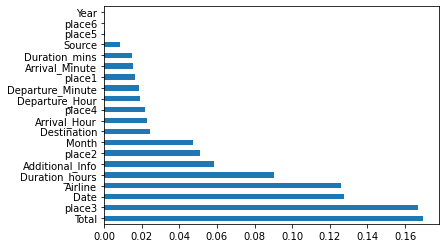

In [288]:
#plot graph of feature importances for better visualization
plt.figure()
feat_importances = pd.Series(selection.feature_importances_, index = x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Hyper-parameter tuning on random forest

In [289]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor?

In [290]:
from sklearn.model_selection import RandomizedSearchCV #faster than grid-searchcv
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)] #no trees
max_features = ['auto', 'sqrt'] #features
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)] #depth
min_samples_split = [2, 5, 10, 15, 100] #for splitting a node
min_samples_leaf = [1, 2, 5, 10] #samples at leaf node

In [291]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [292]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid
                               ,scoring='neg_mean_squared_error', n_iter = 50, cv = 5, 
                               verbose=2, random_state=42, n_jobs = 1)

In [293]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   3.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_est

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=  12.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=  15.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   2.7s
[CV] END max_depth=10, max_features

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   2.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   2.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   2.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   2.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END max_depth=20, max_featu

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   2.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=  12.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=  13.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=  13.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=  12.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=  12.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=15, max_feature

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [294]:
y_pred = rf_random.predict(x_test)

In [295]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [296]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 709.9139080410076
MSE: 2763060.3456479483
RMSE: 1662.2455732075055


c:\users\ameya gupta\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

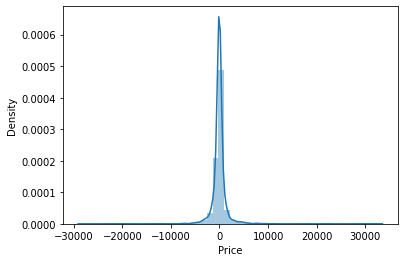

In [297]:
sns.distplot(y_test-y_pred)

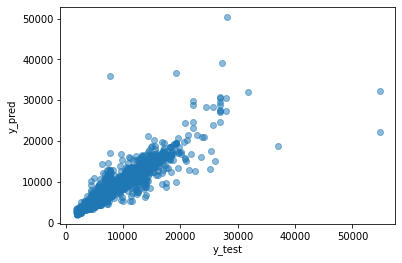

In [298]:
plt.figure()
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Preserving the rf_random regressor

In [299]:
import pickle
file = open('rf_flight.pkl', 'wb')
pickle.dump(rf_random, file)
file.close()

In [300]:
#metrics.r2_score(y_test, y_pred)

In [301]:
rf_random.predict([[8,0,2,8,6,4,2,40,0,8,35,5,55,0,10,21,10,4]])

array([4131.32439023])